Threshold Tuning & Precision–Recall Tradeoff

#import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (precision_score,recall_score,f1_score,precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Load Tuned Model Setup

In [ ]:
#load dataset

In [6]:
df=pd.read_csv("titanic_cleaned.csv")

In [7]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [9]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
rf=RandomForestClassifier(n_estimators=200,max_depth=5,min_samples_split=2,min_samples_leaf=1,max_features="sqrt",
random_state=42)

#fit & transform

In [12]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

#Get Probabilities

In [13]:
y_prob=rf.predict_proba(x_test)[:,1]

In [ ]:
#Evaluate Multiple Thresholds

In [14]:
thresholds=np.arange(0.1,0.9,0.05)
results=[]
for t in thresholds:
    y_pred_t=(y_prob>=t).astype(int)
    results.append([
    t,
    precision_score(y_test,y_pred_t),
    recall_score(y_test,y_pred_t),
    f1_score(y_test,y_pred_t)
    ])
results_df=pd.DataFrame(
    results,
    columns=["Threshold","Precision","Recall","F1"]
)
results_df

,Threshold,Precision,Recall,F1
0,0.10,0.850000,1.000000,0.918919
1,0.15,0.944444,1.000000,0.971429
2,0.20,1.000000,1.000000,1.000000
3,0.25,1.000000,1.000000,1.000000
4,0.30,1.000000,1.000000,1.000000
5,0.35,1.000000,1.000000,1.000000
6,0.40,1.000000,1.000000,1.000000
7,0.45,1.000000,1.000000,1.000000
8,0.50,1.000000,1.000000,1.000000
9,0.55,1.000000,1.000000,1.000000


#Identify Best Threshold

In [15]:
best_threshold=results_df.loc[
results_df["F1"].idxmax(),"Threshold"
]
best_threshold

0.20000000000000004

#Precision–Recall Curve

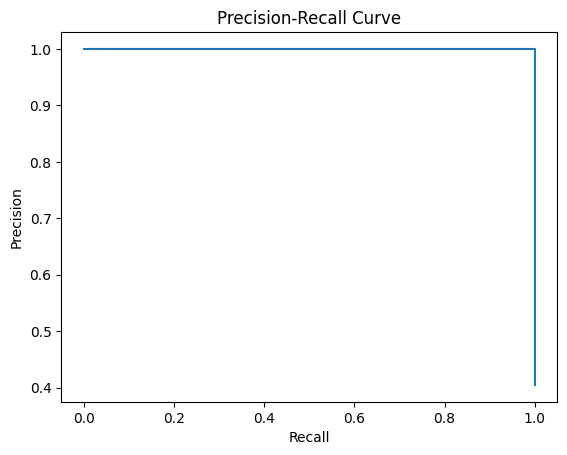

In [17]:
precision,recall,pr_thresholds=precision_recall_curve(y_test,y_prob)
plt.figure()
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

Final Evaluation at Best Threshold

In [18]:
y_final=(y_prob>=best_threshold).astype(int)
print("Precision:",precision_score(y_test,y_final))
print("Recall:",recall_score(y_test,y_final))
print("F1-score:",f1_score(y_test,y_final))

Precision: 1.0
Recall: 1.0
F1-score: 1.0


Why default 0.5 threshold is arbitrary

Difference between probability and class prediction

Effect of increasing threshold:

Precision ↑

Recall ↓

Effect of decreasing threshold:

Recall ↑

Precision ↓

How optimal threshold was selected (F1-based)

Why threshold tuning matters in real applications

🧠 INTERVIEW GOLD (MEMORIZE)

“Instead of relying on the default 0.5 threshold, I tuned the decision threshold using precision–recall tradeoffs and selected an optimal value based on F1-score, aligning model behavior with real-world decision priorities.”